### Import modules

In [1]:
# Standard imports
import pandas as pd
import sys 
import os
import seaborn as sns
import os
import shutil
import numpy as np

# Local imports
import analysis_functions

# Apply better style
analysis_functions.apply_heatmap_style()


### Plot tune scan

In [2]:
# Define study
STUDY_NAME = "oct_chroma_scan_flatvh_75_180_1500"
COLLIDER = "base_collider"
PARQUET_PATH = f"../scans/{STUDY_NAME}/da.parquet"
CONF_MAD_PATH = f"../scans/{STUDY_NAME}/{COLLIDER}/config.yaml"
CONF_COLLIDER_PATH = f"../scans/{STUDY_NAME}/{COLLIDER}/xtrack_1811/config_final.yaml"

# Load dataframe
df = pd.read_parquet(f"../scans/{STUDY_NAME}/da.parquet")

# Round all numbers to 3 decimals
df = df.round(3)

# Keep only relevant collider
df = df.reset_index(level=1)
df = df[df["name base collider"] == COLLIDER]

df


name base collider  \
beam  dqx  dqy  i_oct_b1 i_oct_b2                      
lhcb1 3.0  3.0  225.0    225.0         base_collider   
                250.0    250.0         base_collider   
                275.0    275.0         base_collider   
                300.0    300.0         base_collider   
                325.0    325.0         base_collider   
...                                              ...   
      25.0 25.0 500.0    500.0         base_collider   
                525.0    525.0         base_collider   
                550.0    550.0         base_collider   
                575.0    575.0         base_collider   
                600.0    600.0         base_collider   

                                   normalized amplitude in xy-plane      qx  \
beam  dqx  dqy  i_oct_b1 i_oct_b2                                             
lhcb1 3.0  3.0  225.0    225.0                                5.724  62.315   
                250.0    250.0                                5.310  62.315   
                275.0    275.0                                5.379  62.315   
                300.0    300.0                                5.172  62.315   
                325.0    325.0                                5.034  62.315   
...                                                             ...     ...   
      25.0 25.0 500.0    500.0                                3.724  62.315   
                525.0    525.0                                3.586  62.315   
                550.0    550.0                                3.517  62.315   
                575.0    575.0                                3.517  62.315   
                600.0    600.0                                3.448  62.315   

                                      qy   dqx   dqy  i_bunch_b1  i_bunch_b2  \
beam  dqx  dqy  i_oct_b1 i_oct_b2                                              
lhcb1 3.0  3.0  225.0    225.0     60.32   3.0   3.0         NaN         NaN   
                250.0    250.0     60.32   3.0   3.0         NaN         NaN   
                275.0    275.0     60.32   3.0   3.0         NaN         NaN   
                300.0    300.0     60.32   3.0   3.0         NaN         NaN   
                325.0    325.0     60.32   3.0   3.0         NaN         NaN   
...                                  ...   ...   ...         ...         ...   
      25.0 25.0 500.0    500.0     60.32  25.0  25.0         NaN         NaN   
                525.0    525.0     60.32  25.0  25.0         NaN         NaN   
                550.0    550.0     60.32  25.0  25.0         NaN         NaN   
                575.0    575.0     60.32  25.0  25.0         NaN         NaN   
                600.0    600.0     60.32  25.0  25.0         NaN         NaN   

                                   i_oct_b1  i_oct_b2  \
beam  dqx  dqy  i_oct_b1 i_oct_b2                       
lhcb1 3.0  3.0  225.0    225.0        225.0     225.0   
                250.0    250.0        250.0     250.0   
                275.0    275.0        275.0     275.0   
                300.0    300.0        300.0     300.0   
                325.0    325.0        325.0     325.0   
...                                     ...       ...   
      25.0 25.0 500.0    500.0        500.0     500.0   
                525.0    525.0        525.0     525.0   
                550.0    550.0        550.0     550.0   
                575.0    575.0        575.0     575.0   
                600.0    600.0        600.0     600.0   

                                   num_particles_per_bunch  crossing_angle  
beam  dqx  dqy  i_oct_b1 i_oct_b2                                           
lhcb1 3.0  3.0  225.0    225.0                1.400000e+11           250.0  
                250.0    250.0                1.400000e+11           250.0  
                275.0    275.0                1.400000e+11           250.0  
                300.0    300.0                1.400000e+11           250.0  
                325.0    325.0  

In [3]:
# Reshape for plotting
df_to_plot = df.pivot(index="i_oct_b1", columns="dqx", values="normalized amplitude in xy-plane")
df_to_plot

dqx,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,...,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0
i_oct_b1,,,,,,,,,,,,,,,,,,,,,
-600.0,NaN,4.828,4.897,4.552,4.552,4.621,4.207,4.276,4.276,4.000,...,4.276,4.276,4.138,4.552,4.345,4.345,4.414,4.345,4.207,4.000
-575.0,NaN,5.103,4.828,4.759,4.621,4.621,4.414,4.552,4.276,4.276,...,3.724,4.552,4.276,4.276,4.138,4.345,4.138,4.276,4.207,4.621
-550.0,NaN,5.172,4.897,4.828,4.828,4.690,4.414,4.483,4.345,4.276,...,3.862,4.069,4.276,4.345,3.931,4.414,4.138,4.414,4.276,4.207
-525.0,NaN,5.379,5.103,5.034,4.897,4.759,4.828,4.690,4.483,4.276,...,4.207,3.862,3.793,4.414,4.207,4.345,4.069,4.138,4.621,4.345
-500.0,NaN,5.448,5.379,5.241,5.103,4.897,4.759,4.552,4.483,4.483,...,4.345,3.862,3.862,4.000,4.138,4.069,4.069,3.862,4.276,4.483
-475.0,NaN,5.862,5.517,5.310,5.172,4.966,5.034,4.690,4.552,4.690,...,4.207,3.931,3.862,3.862,4.138,4.138,4.345,4.138,4.000,4.345
-450.0,NaN,5.931,5.862,5.655,5.241,5.310,4.621,4.690,4.828,4.414,...,4.414,4.276,3.862,3.793,4.000,4.207,4.345,4.345,4.483,4.345
-425.0,NaN,6.207,5.931,5.724,5.793,5.517,5.241,4.966,4.621,4.345,...,4.483,4.276,4.207,4.000,4.000,3.931,3.862,4.483,4.345,3.793
-400.0,NaN,6.138,5.931,6.138,5.793,5.724,5.172,5.448,4.690,4.828,...,4.483,4.552,4.483,4.138,4.069,3.862,4.069,4.414,4.345,4.207


In [4]:
# Remove columns with dqx < 5
df_to_plot = df_to_plot.loc[:, df_to_plot.columns >= 5]

In [5]:
l_dq = np.linspace(3, 25, 23, endpoint=True)[2:]
l_oct = np.linspace(-600, 600, 49, endpoint=True)
df_to_plot.index = [str(oct) for oct in l_oct]
df_to_plot.columns = [str(dq) for dq in l_dq]

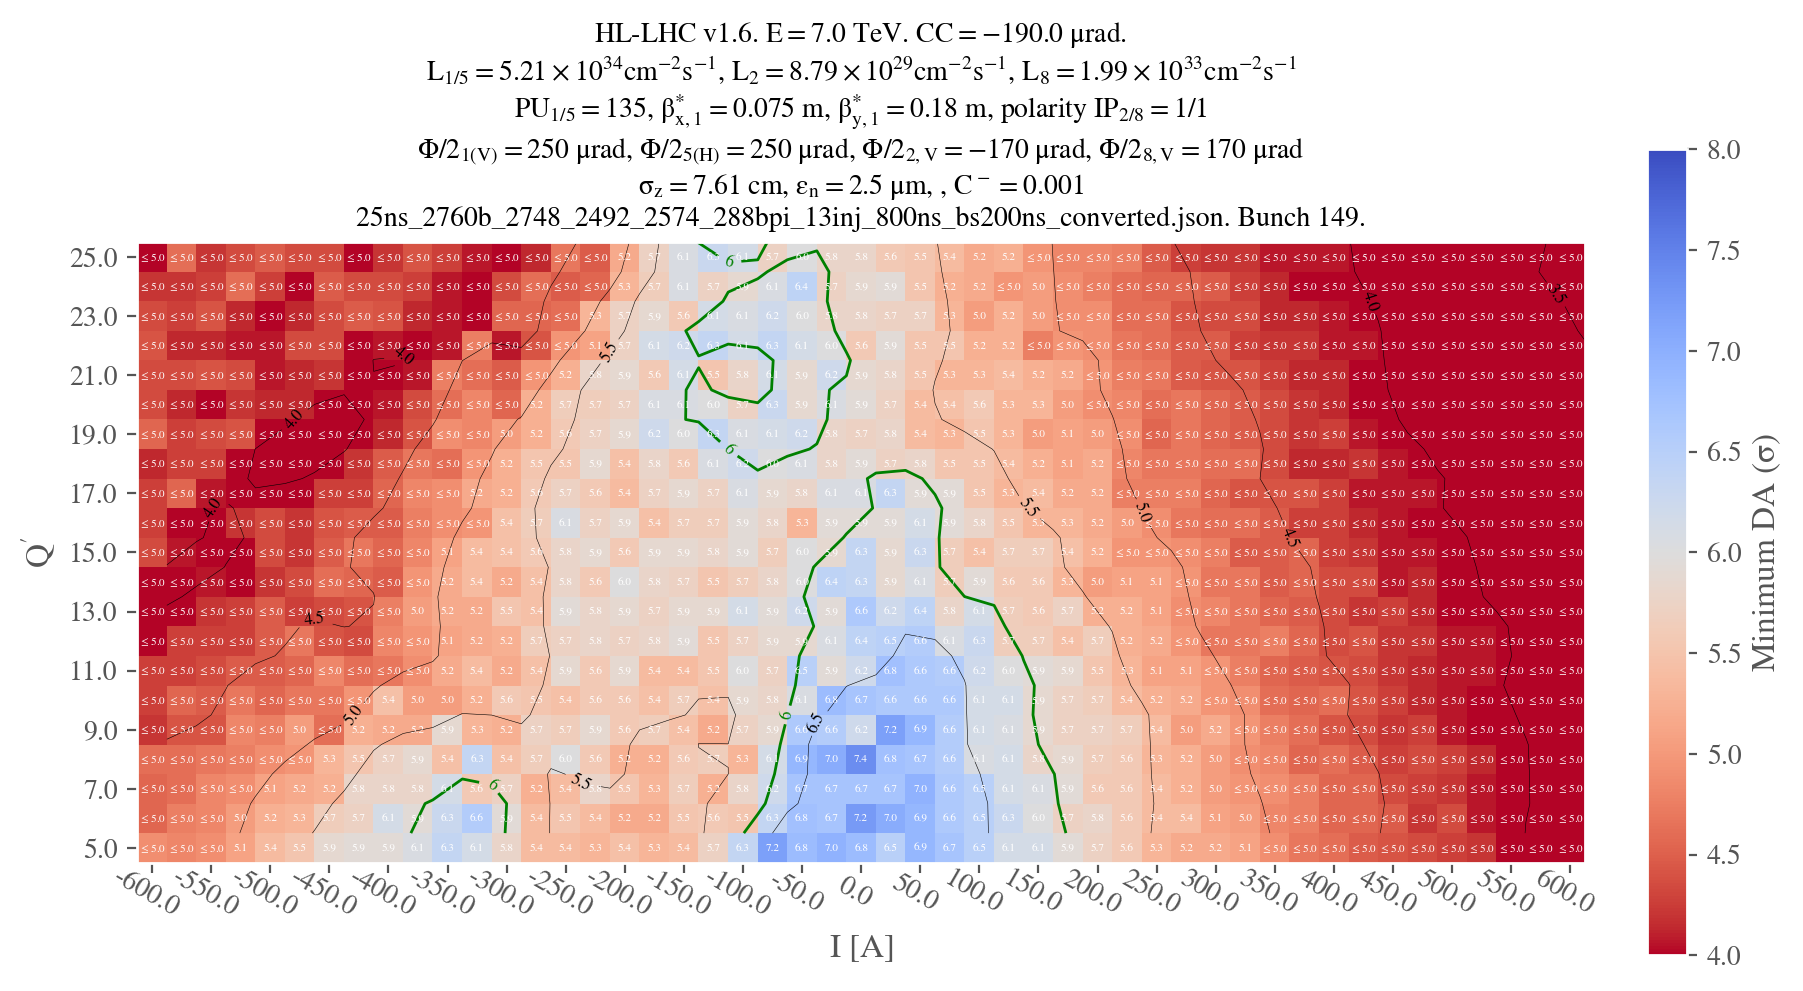

In [6]:
# Load configuration files
conf_mad = analysis_functions.load_config(CONF_MAD_PATH)['config_mad']
conf_collider = analysis_functions.load_config(CONF_COLLIDER_PATH)["config_collider"]
analysis_functions.plot_heatmap(
    df_to_plot.T,
    f'{STUDY_NAME}_{COLLIDER}',
    link=None,
    plot_contours=True,
    conf_mad=conf_mad,
    conf_collider=conf_collider,
    type_crossing="flatvh",
    betx=0.075,
    bety=0.18,
    Nb=False,
    symmetric=False,
    mask_lower_triangle=False,
    green_contour=6.,
    extended_diagonal=False,
    plot_diagonal_lines=False,
    xaxis_ticks_on_top=False,
    display_intensity=False,
    display_xing = True,
    display_chroma = False,
    vmin=4.,
    vmax=8.0,
    CC = True,
    xlabel=r"$I$ [A]",
    ylabel = r"$Q'$",
    figsize=(10, 6),
)
# ! Verified
